# <font color=darkpink>Airbnb Berlin</font>

This script contains the following:

1. Import libraries and data


2. Data cleaning


3. The elbow technique


4. k-means clustering


5. Descriptive statistics of clusters


6. Export data

** **    

## 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans  # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl                  # PyLab is a convenience module that bulk imports matplotlib.
import warnings

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Disable deprecation warnings

warnings.filterwarnings("ignore")

In [4]:
path = r'/Users/berk/Airbnb_Berlin'

In [5]:
# Import data

df_list = pd.read_csv(os.path.join(path, 'Data', 'Prepared_Data', 'list_cleaned_4.csv'), index_col = 0)

## 2. Data cleaning

In [6]:
df_list.columns

Index(['listing_id', 'listing_name', 'host_id', 'host_name', 'district',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'host_total_listings', 'availability_365',
       'review_in_the_last_year', 'license', 'price_category'],
      dtype='object')

In [7]:
df_list.shape

(6063, 19)

In [8]:
# Check for missing values

df_list.isnull().sum()  # No Missing Values

listing_id                 0
listing_name               0
host_id                    0
host_name                  0
district                   0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
last_review                0
reviews_per_month          0
host_total_listings        0
availability_365           0
review_in_the_last_year    0
license                    0
price_category             0
dtype: int64

In [9]:
# Check dups

dups = df_list.duplicated()

dups.shape # No Dups

(6063,)

In [10]:
# Check how many extreme values

df_list[df_list['price'] > 2000]

,listing_id,listing_name,host_id,host_name,district,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_total_listings,availability_365,review_in_the_last_year,license,price_category
1566,19961235,Luxury Penthouse with sauna and rooftop terrace,102979040,Team Suite030,Mitte,Alexanderplatz,52.52267,13.39935,Entire home/apt,2900,2,11,2022-07-11,0.16,20,150,3,01/Z/ZA/006616-17,high_price
3324,41924747,Appartment für 4 Person,7031936,Hotel,Marzahn-Hellersdorf,Hellersdorf-Nord,52.53749,13.60226,Private room,9999,92,2,2022-07-23,0.10,6,231,1,DE 319715940,high_price
3362,41897771,Einzelzimmer Standard,7031936,Hotel,Marzahn-Hellersdorf,Hellersdorf-Nord,52.53664,13.60221,Private room,9999,92,2,2021-08-16,0.10,6,231,0,DE 319715940,high_price
3390,41923918,Doppelzimmer Standart,7031936,Hotel,Marzahn-Hellersdorf,Hellersdorf-Nord,52.53892,13.60420,Private room,9999,92,5,2022-07-31,0.61,6,231,5,DE 319715940,high_price


In [11]:
# Remove extreme values greater than 2000

df_list = df_list[df_list['price'] < 2000] 
df_list.shape

(6059, 19)

In [12]:
# Check how many extreme values

df_list[df_list['minimum_nights'] > 400]

,listing_id,listing_name,host_id,host_name,district,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_total_listings,availability_365,review_in_the_last_year,license,price_category
3246,40769909,"2,5 Zimmer Wohnung im Goltzstraßenkiez.",316724542,Narenthiran,Tempelhof-Schöneberg,Schöneberg-Nord,52.49374,13.35269,Entire home/apt,70,720,7,2020-02-18,0.18,1,89,0,07/Z/AZ/007928-19,middle_price


In [13]:
# Remove extreme values greater than 1000

df_list = df_list[df_list['minimum_nights'] < 400] 
df_list.shape

(6058, 19)

In [14]:
# Keep only non categorical columns for k-means clustering

columns = ["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "host_total_listings", "availability_365", "review_in_the_last_year", "latitude", "longitude"]

In [15]:
df_sub = df_list[columns]

In [16]:
df_sub.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,host_total_listings,availability_365,review_in_the_last_year,latitude,longitude
0,83,63,147,0.88,1,303,0,52.53471,13.41810
1,100,3,14,0.11,8,93,10,52.53867,13.39712
2,180,6,8,0.09,1,0,0,52.53269,13.41805
3,108,3,31,0.24,8,104,28,52.53667,13.39505
4,98,3,15,0.12,8,98,13,52.53881,13.39654


## 3. The elbow technique

In [17]:
# Define the range of potential clusters in the data

num_c1 = range(1,10)

In [18]:
# Define k-means cluster in the range we assigned above

kmeans = [KMeans(n_clusters = i) for i in num_c1]

In [19]:
# Create a score that represents a rate of variation for the given cluster option

score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))]
score

[-213531505.0454976,
 -134227573.25384647,
 -102448844.62558582,
 -80512553.90781038,
 -71782919.68829553,
 -63835080.93841235,
 -56695666.829796016,
 -50579499.173854925,
 -45651750.122565225]

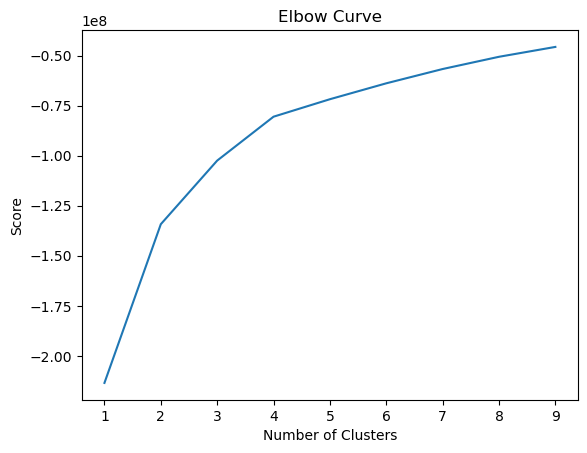

In [20]:
# Plot the elbow curve using PyLab

pl.plot(num_c1, score)
pl.title('Elbow Curve')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.show()

We observe a significant increase in the x-axis value from two to three, followed by a relatively stable curve. This suggests that the ideal number of clusters for this dataset is three.

## 4. k-means clustering

In [21]:
# Create a k-means object

kmeans = KMeans(n_clusters = 3)

In [22]:
# Fit the k-means object to the data

kmeans.fit(df_sub)
df_sub['clusters'] = kmeans.fit_predict(df_sub)
df_sub.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,host_total_listings,availability_365,review_in_the_last_year,latitude,longitude,clusters
0,83,63,147,0.88,1,303,0,52.53471,13.41810,1
1,100,3,14,0.11,8,93,10,52.53867,13.39712,0
2,180,6,8,0.09,1,0,0,52.53269,13.41805,0
3,108,3,31,0.24,8,104,28,52.53667,13.39505,0
4,98,3,15,0.12,8,98,13,52.53881,13.39654,0


In [23]:
df_sub['clusters'].value_counts()

0    3216
1    2238
2     604
Name: clusters, dtype: int64

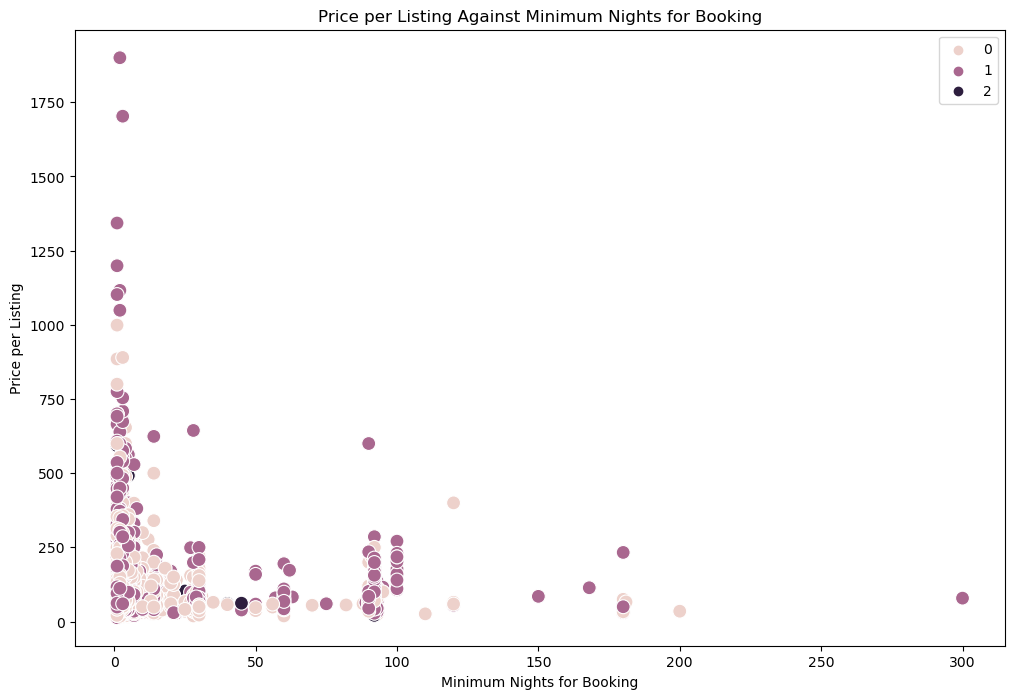

In [24]:
# Plot the clusters for the "price" and "minimum_nights" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_sub['minimum_nights'], y = df_sub['price'], hue = kmeans.labels_, s = 100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Minimum Nights for Booking') # Label x-axis.
plt.ylabel('Price per Listing') # Label y-axis.
plt.title('Price per Listing Against Minimum Nights for Booking')
plt.show()


In [25]:
# Create a crosstab for this cluster

crosstab_mp = pd.crosstab (df_sub['minimum_nights'], df_sub['price'], dropna = False)

In [26]:
crosstab_mp

price,13,15,16,18,19,20,21,22,23,24,...,885,890,999,1049,1102,1116,1199,1343,1703,1900
minimum_nights,,,,,,,,,,,,,,,,,,,,,
1,2,2,1,4,3,2,4,1,4,2,...,1,0,2,0,1,0,1,1,0,0
2,0,1,0,1,0,1,1,2,2,2,...,0,0,0,1,0,1,0,0,0,1
3,0,0,0,1,0,1,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The impact of minimum nights on pricing in Berlin seems to be minimal. Prices for accommodations vary widely regardless of the required minimum stay. This indicates that in Berlin, you can find a diverse range of listings available for different durations, spanning across lower, mid, and upper price ranges.

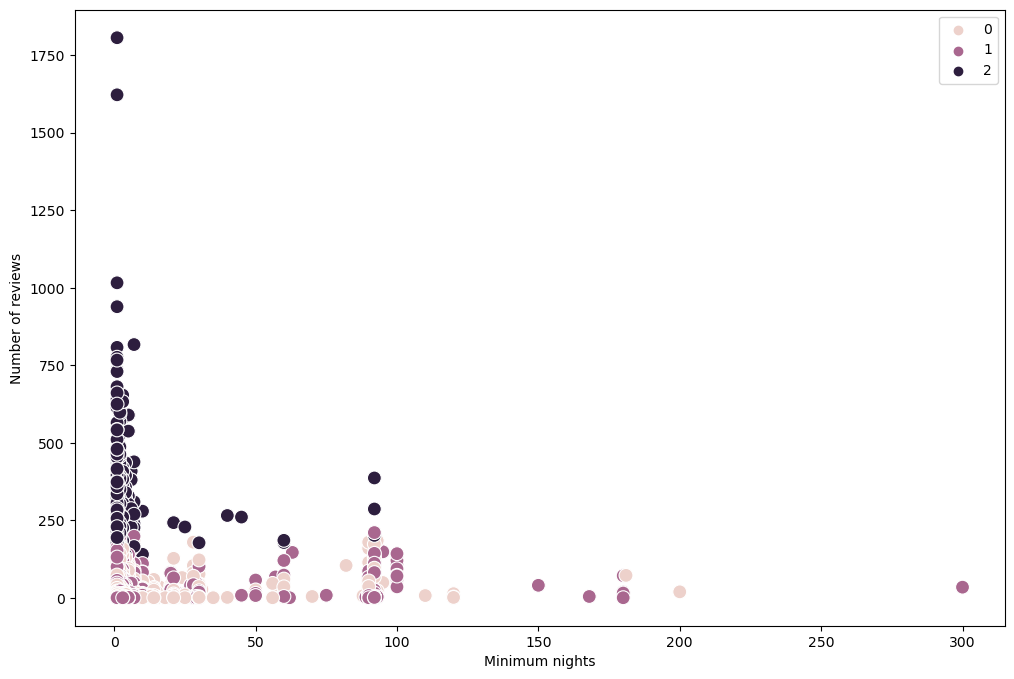

In [27]:
# Plot clusters for number of reviews and minimum nights variables 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_sub['minimum_nights'], y = df_sub['number_of_reviews'], hue = kmeans.labels_, s = 100) 

ax.grid(False) 
plt.xlabel('Minimum nights')
plt.ylabel('Number of reviews')
plt.show()

In [28]:
# Create a crosstab for this cluster

crosstab_mr = pd.crosstab (df_sub['minimum_nights'], df_sub['number_of_reviews'], dropna = False)

In [29]:
crosstab_mr

number_of_reviews,1,2,3,4,5,6,7,8,9,10,...,730,735,767,776,808,817,939,1016,1622,1806
minimum_nights,,,,,,,,,,,,,,,,,,,,,
1,114,91,71,49,52,46,44,42,30,44,...,1,1,1,1,1,0,1,1,1,1
2,53,46,48,36,33,37,33,31,30,35,...,0,0,0,0,0,0,0,0,0,0
3,57,39,40,33,30,31,24,24,19,33,...,0,0,0,0,0,0,0,0,0,0
4,30,25,16,10,14,13,17,9,15,17,...,0,0,0,0,0,0,0,0,0,0
5,20,24,20,19,15,18,11,13,9,8,...,0,0,0,0,0,0,0,0,0,0
6,10,1,6,7,9,3,3,2,3,4,...,0,0,0,0,0,0,0,0,0,0
7,24,22,18,13,10,8,5,6,11,5,...,0,0,0,0,0,1,0,0,0,0
8,3,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9,3,1,1,2,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


The variables "number of reviews" and "minimum nights" significantly differentiate clusters in Berlin. These factors provide insights into guest satisfaction and accommodation preferences, contributing to the distinct characteristics of each cluster.

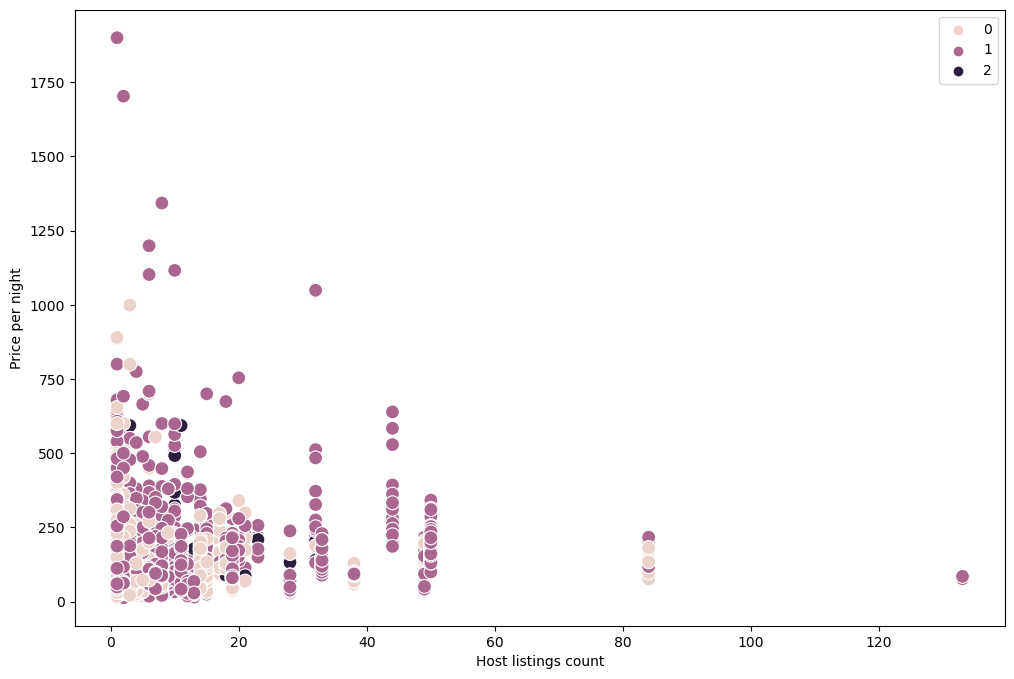

In [30]:
# Plot clusters for price and host listings count variables 

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_sub['host_total_listings'], y = df_sub['price'], hue = kmeans.labels_, s = 100) 

ax.grid(False) 
plt.xlabel('Host listings count') 
plt.ylabel('Price per night')
plt.show()

In [31]:
# Create a crosstab for this cluster

crosstab_hp = pd.crosstab (df_sub['host_total_listings'], df_sub['price'], dropna = False)

In [32]:
crosstab_hp

price,13,15,16,18,19,20,21,22,23,24,...,885,890,999,1049,1102,1116,1199,1343,1703,1900
host_total_listings,,,,,,,,,,,,,,,,,,,,,
1,1,2,1,2,2,3,2,3,7,4,...,1,1,0,0,0,0,0,0,0,1
2,1,0,0,1,0,1,1,1,4,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,3,1,0,0,0,...,0,0,2,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


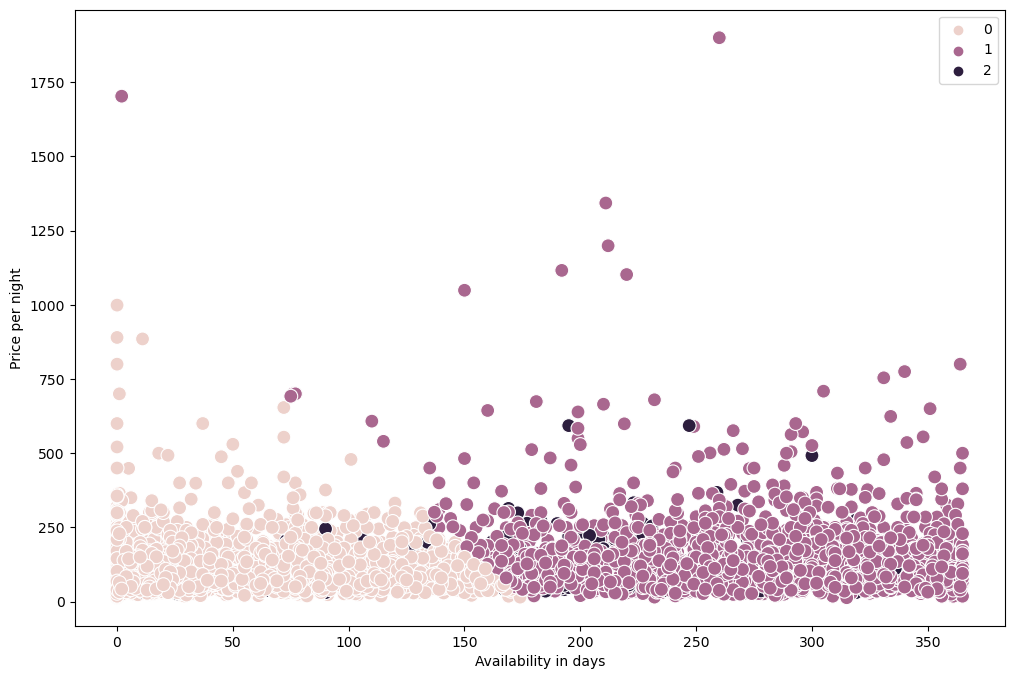

In [33]:
# Plot clusters for price and availability variables 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_sub['availability_365'], y = df_sub['price'], hue = kmeans.labels_, s = 100) 

ax.grid(False) 
plt.xlabel('Availability in days')
plt.ylabel('Price per night')
plt.show()

In [34]:
# Create a crosstab for this cluster

crosstab_ap = pd.crosstab (df_sub['availability_365'], df_sub['price'], dropna = False)

In [35]:
crosstab_ap

price,13,15,16,18,19,20,21,22,23,24,...,885,890,999,1049,1102,1116,1199,1343,1703,1900
availability_365,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,2,0,4,2,3,5,2,...,0,1,2,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The plot clearly illustrates the variations among the clusters.

In Cluster 0, the properties are available for a maximum duration of 155 nights. The prices for these properties typically range from 0 to 250 EUR per night, with a notable peak at 1000 EUR.

Cluster 1 comprises stays that can last anywhere between 85 and 365 nights. The price range for this cluster extends from 0 to 1250 EUR.

Cluster 2 exclusively consists of high-end properties priced at more than 1400 EUR per night.

## 5. Descriptive statistics of clusters

In [36]:
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'dark purple'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'purple'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'pink'

In [37]:
df_sub.groupby('cluster').agg({'price':['mean', 'median'], 
                         'number_of_reviews':['mean', 'median'],
                        'host_total_listings': ['mean', 'median'],
                        'minimum_nights':['mean', 'median'],
                          'availability_365':['mean', 'median']})

price        number_of_reviews        host_total_listings  \
                   mean median              mean median                mean   
cluster                                                                       
dark purple  101.233444   85.0        287.245033  248.5            5.453642   
pink         105.452736   86.0         33.376244   16.0            3.921642   
purple       141.182306  111.0         39.212243   22.0            9.286416   

                   minimum_nights        availability_365         
            median           mean median             mean median  
cluster                                                           
dark purple    2.0       3.402318    2.0       166.382450  174.0  
pink           1.0       6.441542    3.0        40.299440   20.0  
purple         4.0       8.207775    2.0       275.585344  283.0

Overall, the analysis reveals differences between the clusters in terms of price, number of reviews, host total listings, minimum nights, and availability. The Dark Purple Cluster generally has lower prices, higher numbers of reviews, and shorter minimum stay requirements, while the Purple Cluster has higher prices, little bit higher numbers of reviews, longer minimum stay requirements, and greater availability. The Pink Cluster stands out with low numbers of reviews and moderate prices.

## 6. Export data

In [38]:
# Export df_sub

df_sub.to_csv(os.path.join(path, 'Data','Prepared_Data', 'listing_for_kmeans.csv'))

In [39]:
#Export df_list

df_list.to_csv(os.path.join(path, 'Data','Prepared_Data', 'list_cleaned_5.csv'))